## Logistic Regression Challenge

In [1]:
#import the required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

### Task 1: Download the data and load them into Python.
You can find the data [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing&resourcekey=0-BirYbvtYO-hSEt09wpEBRw).

**Note**
- Features and response variables are in different files.
- Be careful about number of spaces between the values in the file.

In [5]:
#Used skipinitialspace=True to avoid errors for extra spaces in the file.
data = pd.read_csv('Smartphone Sensor Data\\Smartphone Sensor Data\\train\\X_train.txt', sep=" ", header=None,skipinitialspace=True)

In [6]:
data_cols=pd.read_csv('Smartphone Sensor Data\\Smartphone Sensor Data\\features.txt',sep=' ', header = None)

In [7]:
#Reading column labels from features file and assigning it to data.columns
data.columns=data_cols.iloc[:,1]

In [8]:
data.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [9]:
data.shape

(7352, 561)

In [10]:
data_y = pd.read_csv('Smartphone Sensor Data\\Smartphone Sensor Data\\train\\y_train.txt', sep=" ", header=None,skipinitialspace=True)

In [11]:
data_y.head()

,0
0,5
1,5
2,5
3,5
4,5


In [14]:
data_y.rename(columns={0:'y'},inplace=True)

In [15]:
y=data_y.y

In [20]:
y

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: y, Length: 7352, dtype: int64

### Task 2: Create a binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent a binary variable indicating if person is walking or not.

In [27]:
y.replace([2,3],1,inplace=True) 

In [28]:
y.replace([4,5,6],0,inplace=True) 

In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7347    1
7348    1
7349    1
7350    1
7351    1
Name: y, Length: 7352, dtype: int64

### Task 3

+ Create a Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y.
+ Compare the results of the Logistic regressions from different Python packages (sklearn, statsmodel).
+ Plot the **fit** of predicted probabilities to the original values.

In [30]:
uni_clf = linear_model.LogisticRegression()

In [40]:
X = data.iloc[:,53]
X = np.array(X)
X=X.reshape(-1,1)#feature 54

In [41]:
uni_clf.fit(X, y)

LogisticRegression()

In [49]:
pred_probs=uni_clf.predict_proba(X)

In [50]:
pred_probs.shape

(7352, 2)

In [74]:
pred_class_0 = [i[0] for i in pred_probs.tolist()]

In [78]:
pred_class_1 = [i[1] for i in pred_probs.tolist()]

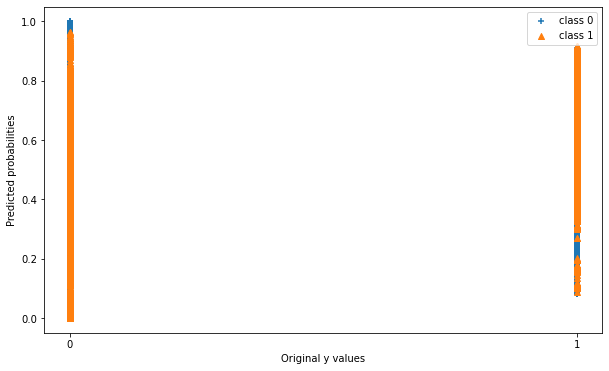

In [93]:
fig, ax = plt.subplots(figsize = (10,6))

# scatter plot
p1=ax.scatter(y,pred_class_0,marker='+')
p2=ax.scatter(y,pred_class_1,marker='^')
ax.set_xticks([0,1])
ax.set_xlabel('Original y values')
ax.set_ylabel('Predicted probabilities')
ax.legend([p1,p2],['class 0','class 1'])

In [94]:
from sklearn.metrics import plot_roc_curve

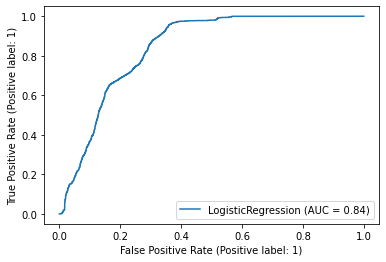

In [95]:
plot_roc_curve(uni_clf, X, y)

### Task 4
- Try to fit a Binary Logistic Regression with all the features? How many are significant?

In [96]:
all_clf = linear_model.LogisticRegression()

In [97]:
res = all_clf.fit(data, y)

### Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

### Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** the important features we have in the dataset. Compare with your peers on who will get the best predictions with the smallest number of features?

### Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.